<a href="https://colab.research.google.com/github/AvelaAI/Myprofile/blob/main/Cencus_2011_Cape_Town.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-953f8322cf98>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


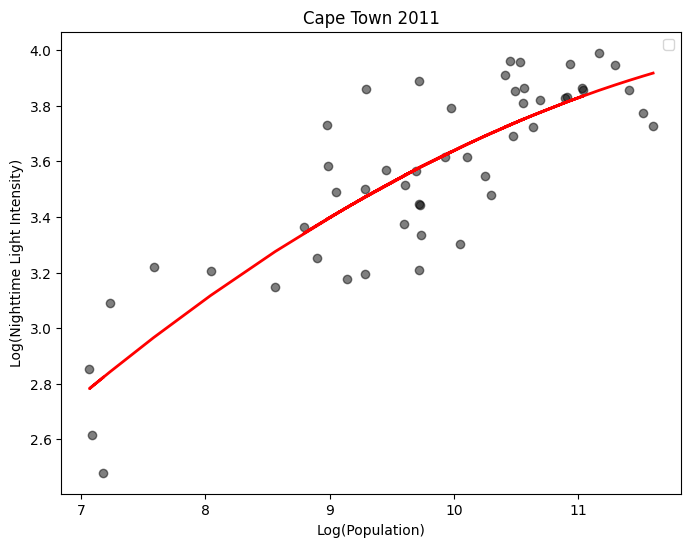

Root Mean Square Error: 0.18
Correlation Coefficient: 0.84
R² Score: 0.73
Standard Deviation: 0.35
P-Value: 0.00000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter1d
from scipy import stats

# Data from user
population = np.array([
    237414, 67491, 56234, 112507, 56114, 106222, 92330, 44842, 1563, 11916,
    5595, 36043, 152030, 39237, 42479, 50, 11890, 12369, 50285, 16776,
    82199, 98468, 4, 17900, 15538, 391749, 2294, 16911, 154615, 46686,
    52401, 33225, 9048, 77121, 11586, 95630, 310485, 36857, 60528, 31980,
    57996, 119462, 1681, 570, 200603, 116, 1075, 6569, 4, 55166
])
nighttime_light = np.array([
    63, 14, 63, 63, 62, 63, 62, 62, 6, 63,
    6, 63, 63, 63, 63, 63, 31, 6, 63, 36,
    53, 63, 12, 21, 21, 48, 6, 31, 63, 63,
    63, 52, 52, 63, 16, 63, 63, 39, 62, 31,
    63, 63, 4, 6, 63, 54, 63, 6, 6, 12
])

# Log transform population and nighttime light
df_population = np.log1p(population)
df_nighttime_light = np.log1p(nighttime_light)

# Apply optimized Gaussian smoothing
df_population_smooth = gaussian_filter1d(df_population, sigma=2)
df_nighttime_light_smooth = gaussian_filter1d(df_nighttime_light, sigma=2)

# Reshape data for sklearn
X = df_population_smooth.reshape(-1, 1)
y = df_nighttime_light_smooth.reshape(-1, 1)

# Use polynomial regression (degree 2 for better fit)
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(df_population_smooth, df_nighttime_light_smooth, color='black', alpha=0.5, )
plt.plot(df_population_smooth, y_pred, color='red', linewidth=2, )
plt.xlabel("Log(Population)")
plt.ylabel("Log(Nighttime Light Intensity)")
plt.title("Cape Town 2011")
plt.legend()
plt.show()

# RMS calculation
rms = np.sqrt(mean_squared_error(y, y_pred))

# Correlation coefficient
correlation = np.corrcoef(df_population_smooth, df_nighttime_light_smooth)[0, 1]

# Standard deviation
std_dev = np.std(df_nighttime_light_smooth)

# P-value calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(df_population_smooth, df_nighttime_light_smooth)

# R-squared value
r2 = r2_score(y, y_pred)

# Print results
print(f"Root Mean Square Error: {rms:.2f}")
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"P-Value: {p_value:.5f}")
